## Gradient Boosting Trial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyswarm import pso
import utils

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


### Importing the Dataset

In [2]:
database = pd.read_excel(r'C:\Users\Chin Siang\OneDrive - Nanyang Technological University\Desktop\NTU FYP\Coding\Material Prediction\Cleaned_list.xlsx', index_col=False)
database

,AHT,Mn(%),Si(%),P(%),Cr(%),Ni(%),Mo(%),Cu(%),W(%),Nb(%),...,QW,OQT,WT,WQ,WQT,ST,T,AHT.1,Tensile Strength (MPa),Yield Strength (MPa)
0,0.20,0.0,0.0,0.040,0.00,0.00,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,360.0,175.0
1,0.00,0.0,0.0,0.000,0.00,0.00,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,380.0,200.0
2,0.20,1.2,0.6,0.035,0.00,0.00,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,400.0,230.0
3,0.20,1.2,0.6,0.035,0.00,0.00,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,400.0,210.0
4,0.00,0.0,0.0,0.035,0.00,0.00,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,475.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,3.30,1.3,0.8,0.300,2.70,4.15,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
705,0.20,1.0,1.0,0.040,12.50,1.00,0.0,0.3,0.0,0,...,0,1,0,0,0,0,0,1,620.0,450.0
706,0.20,1.0,1.0,0.040,12.50,1.00,0.0,0.3,0.0,0,...,0,1,0,0,0,0,0,1,690.0,465.0
707,0.10,1.0,1.0,0.040,12.50,3.80,0.6,0.0,0.0,0,...,0,1,0,0,0,0,0,1,770.0,620.0


### Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split

X, y = database[database.columns[:-1]], database[database.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0, test_size=0.2)

### Gradient Boosting Regression

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

y_hat_train = regressor.predict(X_train)
y_hat_test = regressor.predict(X_test)

(142,)

### Plot Predictions

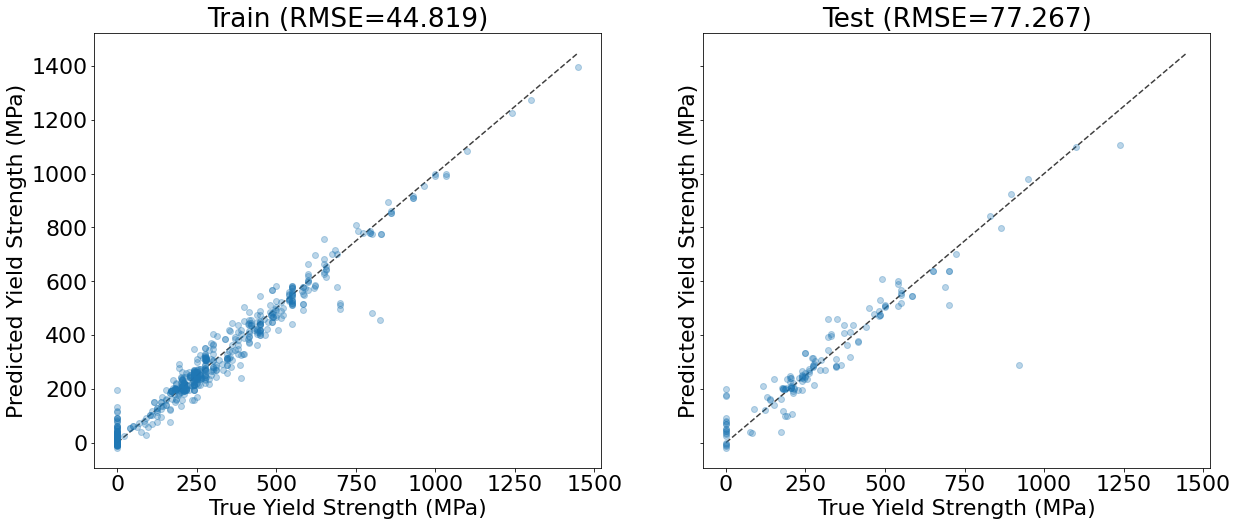

In [43]:
utils.plot_predictions(
    y=[y_train, y_test], y_hat=[y_hat_train, y_hat_test],
    labels=['Train', 'Test']
)

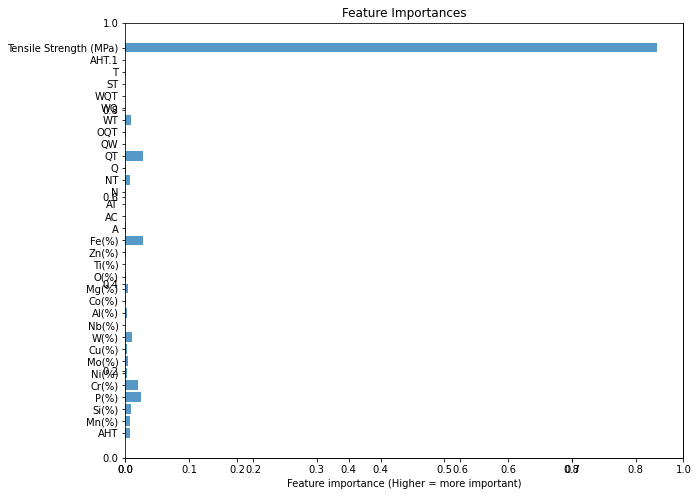

In [44]:
utils.plot_feature_importances(
        importances=regressor.feature_importances_,
        columns=database.columns[:-1])

### Hyper Parameters Tuning

In [45]:
from scipy import stats 

param_distributions = {
    'n_estimators': stats.randint(low=10, high=1000),
    'max_depth': stats.randint(low=2, high=6),
    'min_samples_split': stats.randint(low=2, high=5),
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]
}

In [8]:
from sklearn.model_selection import RandomizedSearchCV

regressor_cv = RandomizedSearchCV(
    regressor, param_distributions=param_distributions,
    n_iter=50, verbose=1)
regressor_cv.fit(X_train, y_train)

print('Best params: \n', regressor_cv.best_params_)

y_hat_train = regressor_cv.predict(X_train)
y_hat_test = regressor_cv.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: 
 {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 754}


(709, 33)

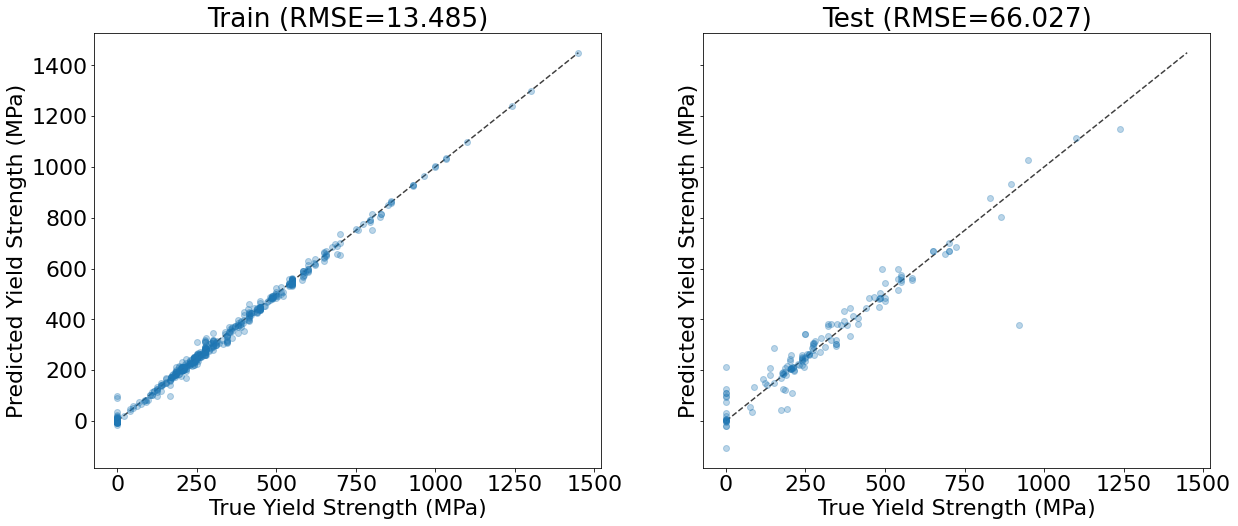

In [9]:
# Plot predictions and feature importances
utils.plot_predictions(
    y=[y_train, y_test],
    y_hat=[y_hat_train, y_hat_test],
    labels=['Train', 'Test'])

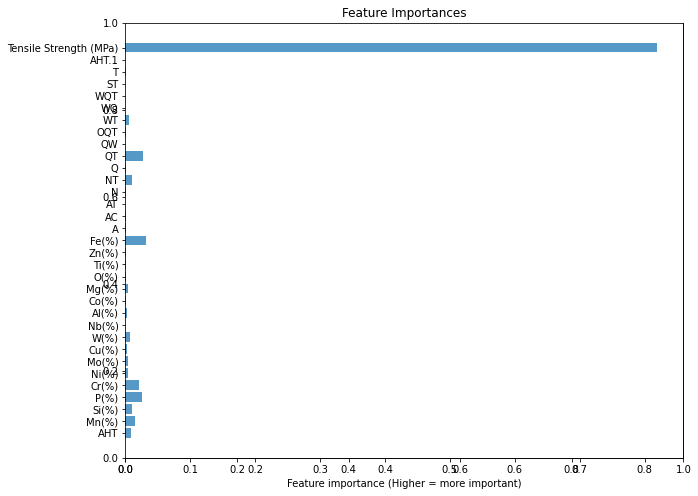

In [10]:
utils.plot_feature_importances(
        importances=regressor_cv.best_estimator_.feature_importances_,
        columns=database.columns[:-1])

### Refit using tuned hyper parameters

In [25]:
best_params = regressor_cv.best_params_
regressor = GradientBoostingRegressor()
regressor.set_params(**best_params)
regressor.fit(X, y)

GradientBoostingRegressor(n_estimators=754)

In [26]:
X.values.reshape(1, -1)

array([[2.00e-01, 0.00e+00, 0.00e+00, ..., 0.00e+00, 1.00e+00, 7.55e+02]])

In [27]:
X.values.shape

(709, 33)

### Using PSO for inverse design

In [28]:
#Setting the bounds required
bounds = pd.read_excel(r'C:\Users\Chin Siang\OneDrive - Nanyang Technological University\Desktop\NTU FYP\Coding\Material Prediction\Bounds.xlsx')
bounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2 non-null      object
 1   C(%)        2 non-null      int64 
 2   Mn(%)       2 non-null      int64 
 3   Si(%)       2 non-null      int64 
 4   P(%)        2 non-null      int64 
 5   Cr(%)       2 non-null      int64 
 6   Ni(%)       2 non-null      int64 
 7   Mo(%)       2 non-null      int64 
 8   Cu(%)       2 non-null      int64 
 9   W(%)        2 non-null      int64 
 10  Nb(%)       2 non-null      int64 
 11  Al(%)       2 non-null      int64 
 12  Co(%)       2 non-null      int64 
 13  Mg(%)       2 non-null      int64 
 14  O(%)        2 non-null      int64 
 15  Ti(%)       2 non-null      int64 
 16  Zn(%)       2 non-null      int64 
 17  Fe(%)       2 non-null      int64 
 18  A           2 non-null      int64 
 19  AC          2 non-null      int64 
 20  AT          2 

In [29]:
upper_bounds = list(bounds.describe().loc['max'])
lower_bounds = list(bounds.describe().loc['min'])

def objective(X):
#minimize oxygen + all Heat treatment

    return X[13]**2 
# 
def constraints(X):
# we want yield strength to be >200MPa
    predicted_strength = regressor.predict(X.reshape(1, -1))
    cons_str_lower = predicted_strength - 200

    
    return [cons_str_lower]

In [31]:
from pyswarm import pso

X_opts = []
n_runs = 5
for n in range(n_runs):
    X_opt, _ = pso(
        objective, lower_bounds, upper_bounds, f_ieqcons=constraints,
        swarmsize=100, maxiter=200)
    X_opts.append(X_opt)
X_opts = np.asarray(X_opts)
y_hat_opts = regressor.predict(X_opts).reshape(-1, 1)
data_opt = np.concatenate([X_opts, y_hat_opts], axis=1)
df_predict = pd.DataFrame(columns=new_database.columns, data=data_opt)

C:\Users\Chin Siang\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 32 features, but GradientBoostingRegressor is expecting 33 features as input.